<style>
.data-size-list {
  background: #232946;
  border-radius: 12px;
  padding: 24px 32px;
  color: #eebbc3;
  font-size: 1.15em;
  box-shadow: 0 2px 12px #0002;
  max-width: 420px;
  margin-bottom: 1em;
}
.data-size-list h2 {
  color: #fffffe;
  margin-top: 0;
  margin-bottom: 18px;
  font-size: 1.5em;
  letter-spacing: 1px;
}
.data-size-list li {
  margin-bottom: 10px;
  list-style: none;
  padding-left: 0;
}
.data-size-list li .icon {
  font-size: 1.1em;
  margin-right: 8px;
}
.data-size-list li .players { color: #ffd803; }
.data-size-list li .clubs { color: #bae8e8; }
.data-size-list li .market { color: #ff6f3c; }
.data-size-list li .transfers { color: #29c7ac; }
.data-size-list li .stats { color: #a3f7bf; }
.data-size-list li .injuries { color: #ffb4a2; }
.data-size-list li .intl { color: #b388eb; }
.data-size-list li .network { color: #f6dfeb; }
.data-size-list li .ideas { color: #f9bc60; font-weight: bold; }
</style>

<div class="data-size-list">
  <h2>🧩 Data size</h2>
  <ul>
    <li><span class="icon players">📌</span>41,000+ <span style="color:#ffd803;">players</span></li>
    <li><span class="icon clubs">📌</span>1,400+ <span style="color:#bae8e8;">Clubs</span></li>
    <li><span class="icon market">📌</span>427K+ <span style="color:#ff6f3c;">market valuation</span></li>
    <li><span class="icon transfers">📌</span>280K+ <span style="color:#29c7ac;">Transfers</span></li>
    <li><span class="icon stats">📌</span>765K+ <span style="color:#a3f7bf;">match statistics</span></li>
    <li><span class="icon injuries">📌</span>78K <span style="color:#ffb4a2;">injuries</span></li>
    <li><span class="icon intl">📌</span>62K <span style="color:#b388eb;">international matches</span></li>
    <li><span class="icon network">📌</span>681K <span style="color:#f6dfeb;">Teammates Network</span></li>
    <li><span class="icon ideas">🚀</span>Possible <span style="color:#f9bc60;">project ideas</span></li>
  </ul>
</div>

<div style="background:#16161a; color:#fff; padding:30px 30px; border-radius:30px; max-width:420px;">
  <b>🧠 Advanced Data Science Libraries</b>
  <ul style="margin-top:30px;">
    <li>pandas</li>
    <li>numpy</li>
    <li>matplotlib</li>
    <li>seaborn</li>
    <li>pyspark</li>
    <li>scikit-learn</li>
    <li>xgboost</li>
    <li>mlflow</li>
  </ul>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#https://plotly.com/ => search about library website to understande the analysis
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx

#Apache Spark Library 
from pyspark.sql import SparkSession #to create session in spark
from pyspark.sql import functions as F
from pyspark.sql.functions import sum
#Apache Spark Machine Learning
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


#disapper waening
import warnings
warnings.filterwarnings("ignore")


/kaggle/input/football-datasets/team_competitions_seasons/team_competitions_seasons.csv
/kaggle/input/football-datasets/transfer_history/transfer_history.csv
/kaggle/input/football-datasets/team_children/team_children.csv
/kaggle/input/football-datasets/player_performances/player_performances.csv
/kaggle/input/football-datasets/team_details/team_details.csv
/kaggle/input/football-datasets/player_profiles/player_profiles.csv
/kaggle/input/football-datasets/player_injuries/player_injuries.csv
/kaggle/input/football-datasets/player_national_performances/player_national_performances.csv
/kaggle/input/football-datasets/player_market_value/player_market_value.csv
/kaggle/input/football-datasets/player_latest_market_value/player_latest_market_value.csv
/kaggle/input/football-datasets/player_teammates_played_with/player_teammates_played_with.csv


## 🧩 Core components of Spark

# <div style="background: linear-gradient(135deg, #232526 0%, #1e3c72 40%, #ff6f3c 100%); color: #fff; padding: 22px 28px; border-radius: 16px; max-width: 540px; box-shadow: 0 4px 24px #1e3c7260;">
#   <h3 style="margin-top:0; background: linear-gradient(60deg, #ffd803 60%, #bae8e8 100%); -webkit-background-clip: text; -webkit-text-fill-color: transparent; font-weight: 400;">1. Spark Core</h3>
#   <ul style="margin: 12px 0 0 22px;">
#     <li><b style="color:#f9bc60;">Who deals with:</b></li>
#     <li style="color:#bae8e8;">Distributed Processing</li>
#     <li style="color:#b388eb;">Cluster Management</li>
#     <li>
#       <span style="color:#ffb4a2;">RDD</span> 
#       (<span style="color:#ffd803;">Resilient Distributed Dataset</span>) 
#       &rarr; 
#       <span style="background: linear-gradient(90deg, #bae8e8 60%, #29c7ac 100%); -webkit-background-clip: text; -webkit-text-fill-color: transparent; font-weight:bold;">Low-level API</span>
#     </li>
#   </ul>
# </div>

In [2]:
# 📂 Start Spark Session

# Create Spark Session
spark = SparkSession.builder \
    .appName("Football Analysis") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/03 08:01:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# 📂 Load Data using Spark
data_paths = [
    "/kaggle/input/football-datasets/player_injuries/player_injuries.csv",
    "/kaggle/input/football-datasets/player_latest_market_value/player_latest_market_value.csv",
    "/kaggle/input/football-datasets/player_market_value/player_market_value.csv",
    "/kaggle/input/football-datasets/player_national_performances/player_national_performances.csv",
    "/kaggle/input/football-datasets/player_performances/player_performances.csv",
    "/kaggle/input/football-datasets/player_profiles/player_profiles.csv",
    "/kaggle/input/football-datasets/player_teammates_played_with/player_teammates_played_with.csv",
    "/kaggle/input/football-datasets/team_children/team_children.csv",
    "/kaggle/input/football-datasets/team_competitions_seasons/team_competitions_seasons.csv",
    "/kaggle/input/football-datasets/team_details/team_details.csv",
    "/kaggle/input/football-datasets/transfer_history/transfer_history.csv"
]

In [4]:
# Dictionary to hold DataFrames
dfs = {}

for path in data_paths:
    name = path.split("/")[-2]  # folder name as key (: player_injuries)
    df = spark.read.csv(path, header=True, inferSchema=True)
    dfs[name] = df
   

In [5]:
# Example: Show schema and sample for player_injuries
dfs["player_injuries"].printSchema()
dfs["player_injuries"].show(5)

root
 |-- player_id: integer (nullable = true)
 |-- season_name: string (nullable = true)
 |-- injury_reason: string (nullable = true)
 |-- from_date: date (nullable = true)
 |-- end_date: date (nullable = true)
 |-- days_missed: double (nullable = true)
 |-- games_missed: integer (nullable = true)

+---------+-----------+-------------+----------+----------+-----------+------------+
|player_id|season_name|injury_reason| from_date|  end_date|days_missed|games_missed|
+---------+-----------+-------------+----------+----------+-----------+------------+
|   749087|      22/23|Facial injury|2022-09-11|2022-09-21|       11.0|           2|
|   187288|      23/24|Muscle injury|2023-12-10|2023-12-25|       16.0|           2|
|   187288|      23/24|Muscle injury|2023-11-20|2023-12-05|       16.0|           2|
|   187288|      23/24|Muscle injury|2023-08-10|2023-09-05|       27.0|           4|
|   187288|      21/22|  minor knock|2021-11-25|2021-11-28|        4.0|           1|
+---------+--------

In [6]:
# take data injuries
injuries = dfs["player_injuries"]

# Take data profiles (which contain the names)
profiles = dfs["player_profiles"]

# Join on player_id
inj_with_names = injuries.join(
    profiles.select("player_id", "player_name"),
    on="player_id",
    how="left"
)

# Calculating the number of injuries for each player
inj_with_names.groupBy("player_name") \
    .count() \
    .orderBy("count", ascending=False) \
    .show(10)


+--------------------+-----+
|         player_name|count|
+--------------------+-----+
|                NULL|  313|
|David Brooks (277...|   15|
|Philipp Klement (...|   15|
|Florian Grillitsc...|   15|
|      Bruma (139396)|   15|
|Thibaut Courtois ...|   15|
|Ryota Oshima (164...|   15|
|Marcel Seegert (1...|   15|
|   Bernardo (364258)|   15|
| Yuya Osako (108650)|   15|
+--------------------+-----+
only showing top 10 rows



## Average days lost due to injuries

In [7]:
#Average days lost due to injuries
inj_with_names.groupBy("player_name") \
    .agg(
        F.count("*").alias("n_injuries"),
        F.avg("days_missed").alias("avg_days_missed")
    ) \
    .orderBy(F.desc("n_injuries")) \
    .show(10)


+--------------------+----------+------------------+
|         player_name|n_injuries|   avg_days_missed|
+--------------------+----------+------------------+
|                NULL|       313|47.229166666666664|
|David Brooks (277...|        15|              67.6|
|Philipp Klement (...|        15|              17.8|
|Florian Grillitsc...|        15|16.133333333333333|
|      Bruma (139396)|        15|13.733333333333333|
|Thibaut Courtois ...|        15|30.733333333333334|
|Ryota Oshima (164...|        15| 68.66666666666667|
|Marcel Seegert (1...|        15|              21.4|
|   Bernardo (364258)|        15|              35.6|
| Yuya Osako (108650)|        15|14.533333333333333|
+--------------------+----------+------------------+
only showing top 10 rows



## understand Players Data

In [8]:
#show schema about player profiles data 
dfs["player_profiles"].printSchema()


root
 |-- player_id: integer (nullable = true)
 |-- player_slug: string (nullable = true)
 |-- player_name: string (nullable = true)
 |-- player_image_url: string (nullable = true)
 |-- name_in_home_country: string (nullable = true)
 |-- date_of_birth: date (nullable = true)
 |-- place_of_birth: string (nullable = true)
 |-- country_of_birth: string (nullable = true)
 |-- height: double (nullable = true)
 |-- citizenship: string (nullable = true)
 |-- is_eu: boolean (nullable = true)
 |-- position: string (nullable = true)
 |-- main_position: string (nullable = true)
 |-- foot: string (nullable = true)
 |-- current_club_id: integer (nullable = true)
 |-- current_club_name: string (nullable = true)
 |-- joined: date (nullable = true)
 |-- contract_expires: date (nullable = true)
 |-- outfitter: string (nullable = true)
 |-- social_media_url: string (nullable = true)
 |-- player_agent_id: integer (nullable = true)
 |-- player_agent_name: string (nullable = true)
 |-- contract_option: str

In [9]:
#show players Name in data
dfs["player_profiles"].select('player_name').show()

+--------------------+
|         player_name|
+--------------------+
|Alessandro Luchet...|
|David Hickson (41...|
|Erzhan Tokotaev (...|
|Wilfried Ndollo B...|
|Théo Lucbert (683...|
|Robert Klaasen (1...|
|Moutaz Neffati (1...|
|Gonçalo Encarnaçã...|
|Matheus Vieira (4...|
|Facundo Rassol (9...|
|Williams Alarcón ...|
|Francesco Batigna...|
|Juan González (45...|
|Edson Álvarez (40...|
|Jur Schipper (940...|
|Jonathan Guerrero...|
| Semi Ajayi (251912)|
|Nicolò Franzoni (...|
|Ethan Brandy (678...|
|Ignacio Salvatier...|
+--------------------+
only showing top 20 rows



In [10]:
#the current club name for frist 20 players 
dfs["player_profiles"].select('current_club_name').show()

+--------------------+
|   current_club_name|
+--------------------+
| Frosinone Primavera|
|KFUM-Kameratene Oslo|
|          FC Andijon|
|   Montpellier HSC B|
|   Stade Poitevin FC|
|      MVV Maastricht|
|      IFK Norrköping|
|      SC Farense U23|
|        Without Club|
|CA Defensores Uni...|
|     CA Boca Juniors|
|Fiorentina Primavera|
|CA Chacarita Juniors|
|     West Ham United|
|      AZ Alkmaar U21|
| Alebrijes de Oaxaca|
|           Hull City|
|    FC Turin Weitere|
|   FC Stade Nyonnais|
|           CA Güemes|
+--------------------+
only showing top 20 rows



In [11]:
dfs["player_profiles"].select('main_position').show()

+-------------+
|main_position|
+-------------+
|     Defender|
|     Defender|
|   Goalkeeper|
|     Defender|
|       Attack|
|     Midfield|
|     Defender|
|       Attack|
|       Attack|
|     Defender|
|     Midfield|
|     Defender|
|     Defender|
|     Midfield|
|   Goalkeeper|
|       Attack|
|     Defender|
|       Attack|
|     Defender|
|     Defender|
+-------------+
only showing top 20 rows



## ِData Analysis for this columns 

In [12]:
profiles = dfs["player_profiles"].select(
    "player_name", "current_club_name", "joined", "main_position", "foot"
)

In [13]:
#convert this to pandas library
profiles_pd = profiles.toPandas()


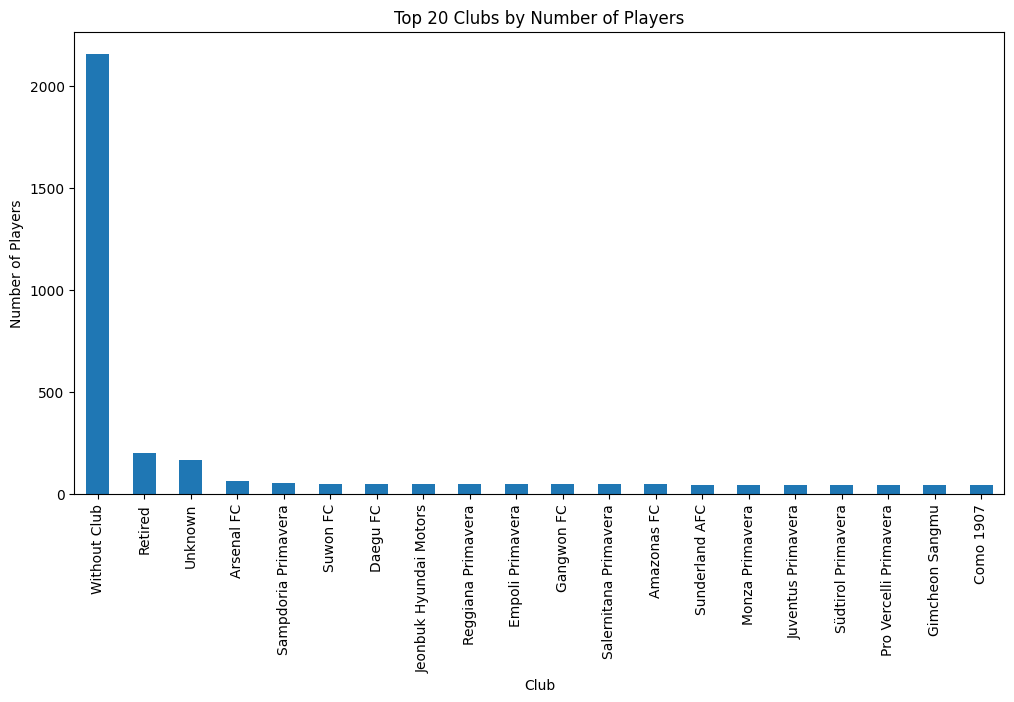

In [14]:
#show the current club for frist 20 columns
profiles_pd['current_club_name'].value_counts().head(20).plot(
    kind='bar',
    figsize=(12,6),
    title="Top 20 Clubs by Number of Players"
)
plt.xlabel("Club")
plt.ylabel("Number of Players")
plt.show()

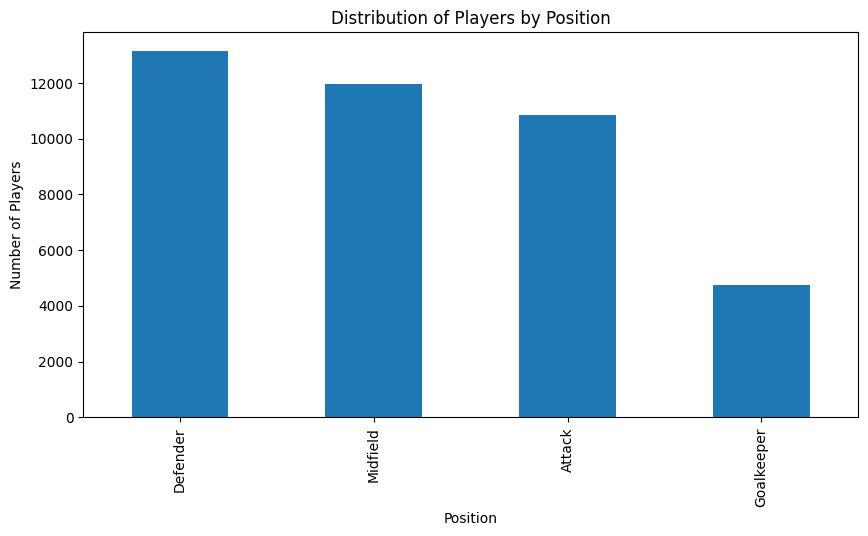

In [15]:
#the postition for frist 20 players 
profiles_pd['main_position'].value_counts().plot(
    kind='bar',
    figsize=(10,5),
    title="Distribution of Players by Position"
)
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.show()


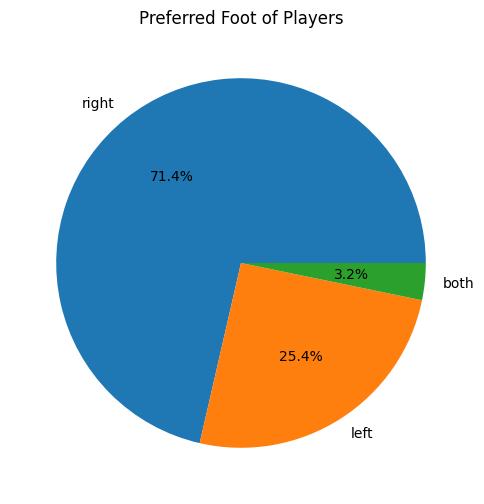

In [16]:
#(Foot: Left / Right)
profiles_pd['foot'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title="Preferred Foot of Players"
)
plt.ylabel("")
plt.show()


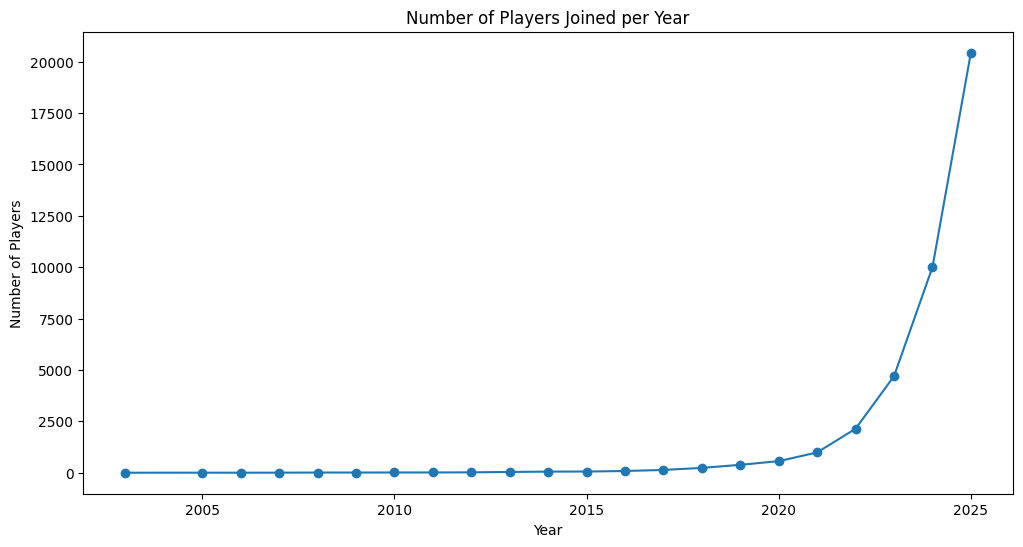

In [17]:
#joining year for players
profiles_pd['joined_year'] = pd.to_datetime(profiles_pd['joined']).dt.year

profiles_pd['joined_year'].value_counts().sort_index().plot(
    kind='line',
    figsize=(12,6),
    marker='o',
    title="Number of Players Joined per Year"
)
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.show()


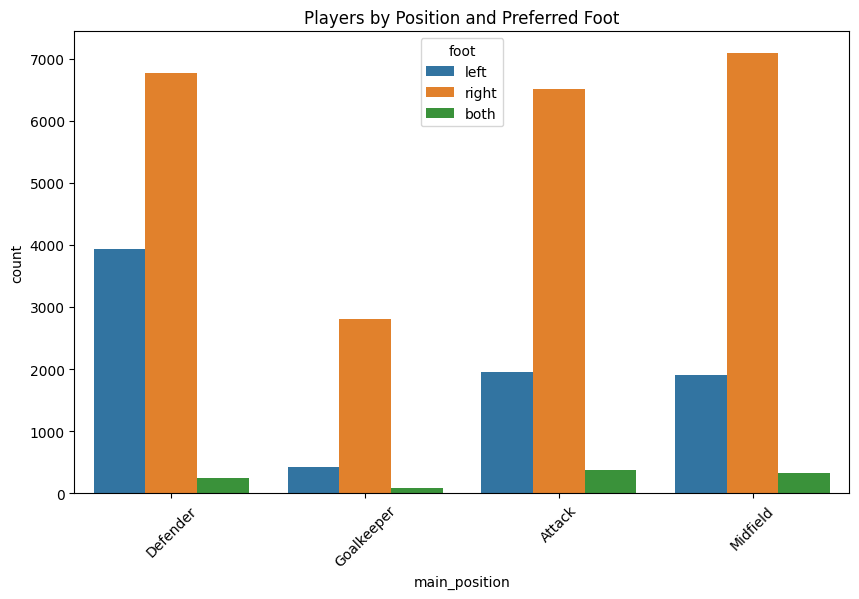

In [18]:
#players (position & Foot)
plt.figure(figsize=(10,6))
sns.countplot(data=profiles_pd, x="main_position", hue="foot")
plt.title("Players by Position and Preferred Foot")
plt.xticks(rotation=45)
plt.show()


## Team details

In [19]:
#show schema about team data
dfs["team_details"].printSchema()

root
 |-- club_id: integer (nullable = true)
 |-- club_slug: string (nullable = true)
 |-- club_name: string (nullable = true)
 |-- logo_url: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- season_id: integer (nullable = true)
 |-- competition_id: string (nullable = true)
 |-- competition_slug: string (nullable = true)
 |-- competition_name: string (nullable = true)
 |-- club_division: string (nullable = true)
 |-- source_url: string (nullable = true)
 |-- _last_modified_at: timestamp (nullable = true)



In [20]:
#show the competition_name 
dfs["team_details"].select('competition_name').show()

+--------------------+
|    competition_name|
+--------------------+
|      Super League 1|
|      Premier League|
|Nemzeti Bajnokság...|
|Primera Federació...|
|       Liga Portugal|
|    USL Championship|
|    Challenge League|
|   Regionalliga Nord|
|Primera Federació...|
|          Eredivisie|
|           Niké Liga|
|Campionato nazion...|
|Challenger Pro Le...|
|             LaLiga2|
|             Serie A|
|             Serie B|
|Championnat Natio...|
|Championnat Natio...|
|        Championship|
|           Superliga|
+--------------------+
only showing top 20 rows



## Team Details Analysis

In [21]:
#select needed columns to convert it
teams = dfs["team_details"].select(
    "club_name", "country_name", "competition_name", "season_id", "club_division"
)

teams_pd = teams.toPandas()


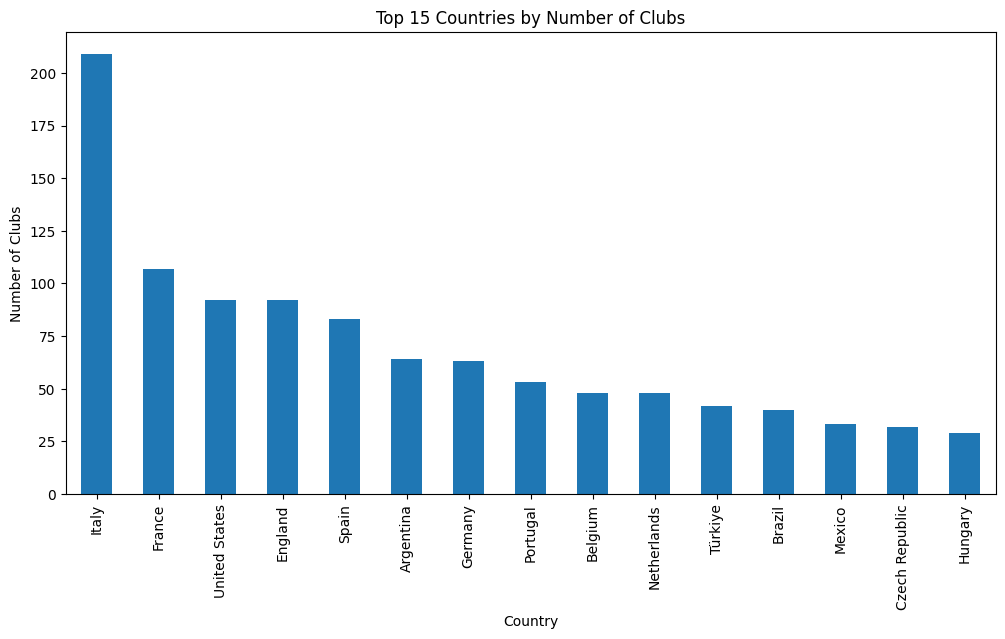

In [22]:
#number of club for each country
teams_pd['country_name'].value_counts().head(15).plot(
    kind='bar',
    figsize=(12,6),
    title="Top 15 Countries by Number of Clubs"
)
plt.xlabel("Country")
plt.ylabel("Number of Clubs")
plt.show()


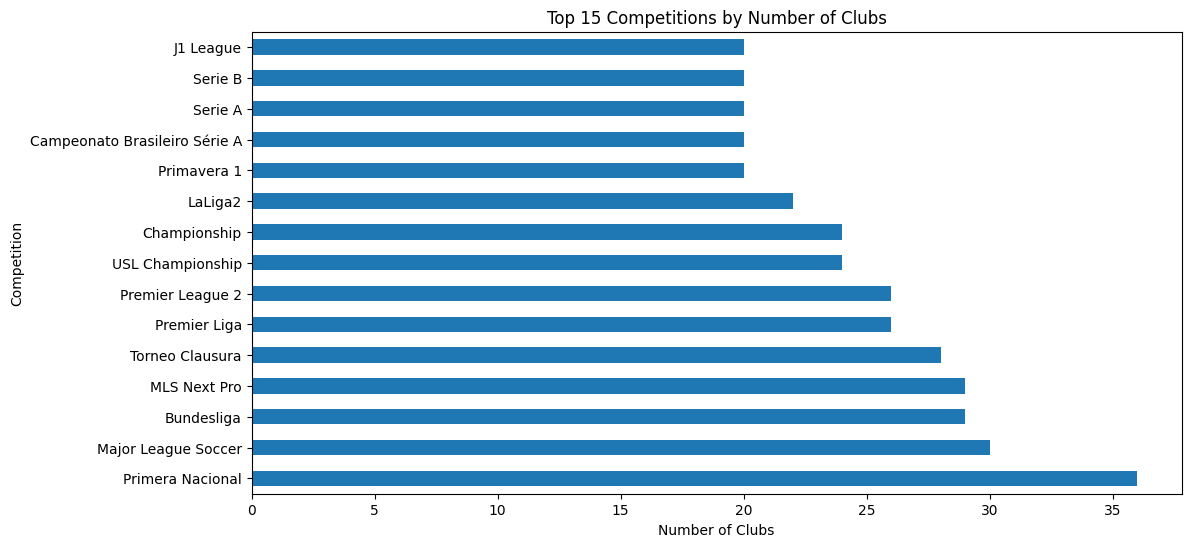

In [23]:
#Number of clubs participating in each tournament (Competition)
teams_pd['competition_name'].value_counts().head(15).plot(
    kind='barh',
    figsize=(12,6),
    title="Top 15 Competitions by Number of Clubs"
)
plt.xlabel("Number of Clubs")
plt.ylabel("Competition")
plt.show()


## Advanced EDA

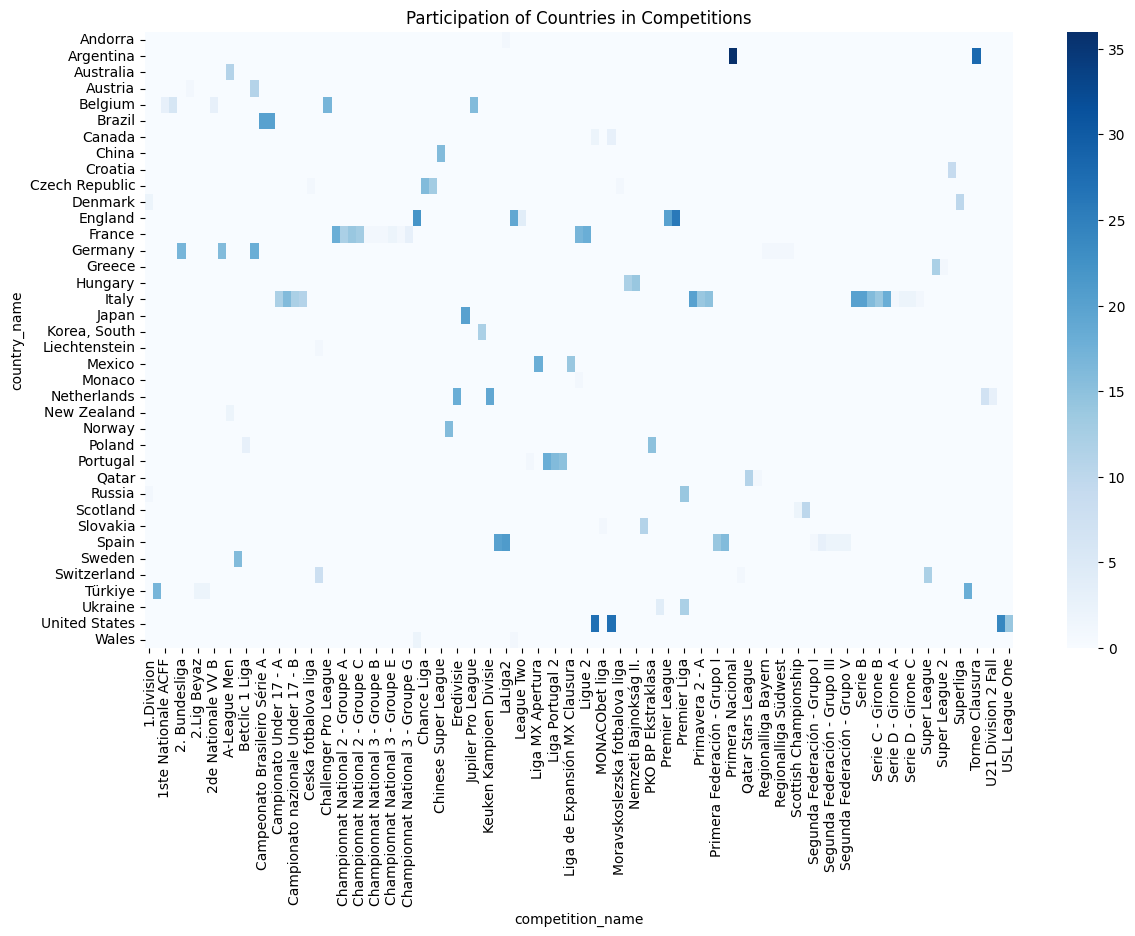

In [24]:
#The relationship between the country and the championship (Heatmap)
heatmap_data = teams_pd.groupby(["country_name", "competition_name"]).size().reset_index(name="count")

pivot_data = heatmap_data.pivot(
    index="country_name",
    columns="competition_name",
    values="count"
).fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_data, cmap="Blues", cbar=True)
plt.title("Participation of Countries in Competitions")
plt.show()


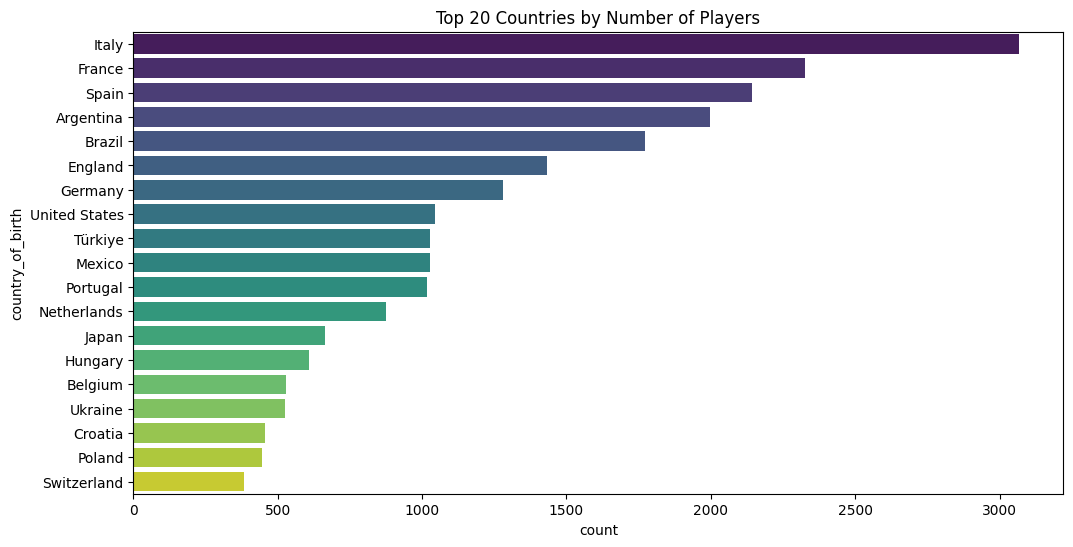

In [25]:
#Distribution of players according to nationality
players_by_country = dfs['player_profiles'].groupBy("country_of_birth").count().orderBy("count", ascending=False)
players_by_country_pd = players_by_country.limit(20).toPandas()

plt.figure(figsize=(12,6))
sns.barplot(x="count", y="country_of_birth", data=players_by_country_pd, palette="viridis")
plt.title("Top 20 Countries by Number of Players")
plt.show()


In [26]:
perf_value = dfs['player_performances'].join(dfs['player_market_value'], "player_id", "inner") \
    .select("player_id", "minutes_played", "goals", "assists", "value")

perf_value_pd = perf_value.sample(fraction=0.01).toPandas()

perf_value_pd = perf_value_pd.fillna({"goals": 0, "assists": 0, "minutes_played": 0, "value": 0})


In [27]:
injury_stats = injuries.groupBy("injury_reason") \
    .agg({"days_missed":"avg", "games_missed":"avg"}) \
    .withColumnRenamed("avg(days_missed)", "avg_days") \
    .withColumnRenamed("avg(games_missed)", "avg_games")

injury_pd = injury_stats.toPandas().sort_values("avg_days", ascending=False).head(15)


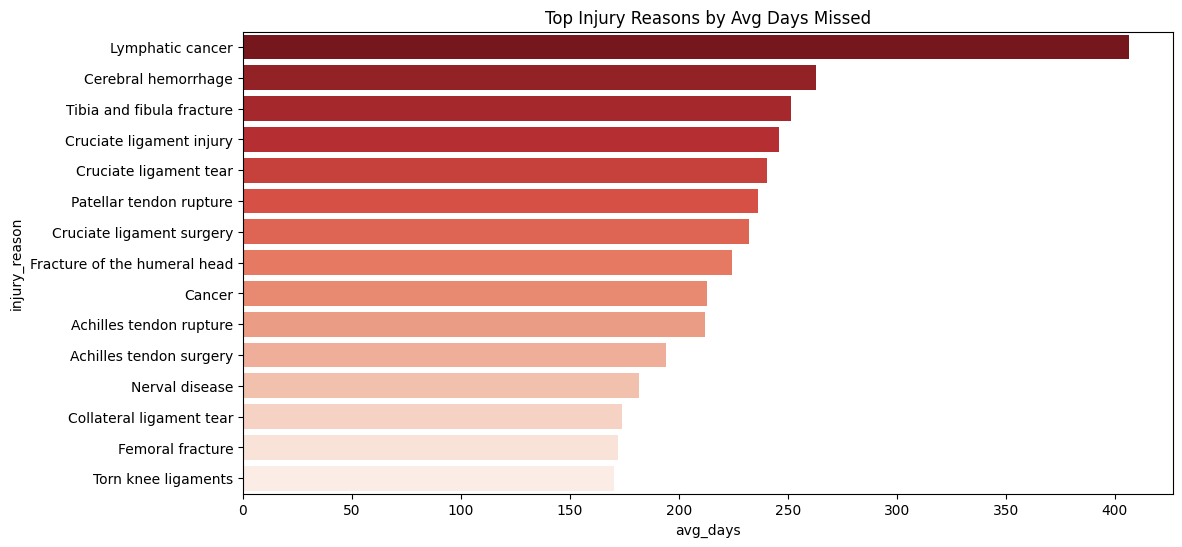

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(y="injury_reason", x="avg_days", data=injury_pd, palette="Reds_r")
plt.title("Top Injury Reasons by Avg Days Missed")
plt.show()


##  Player transfers between clubs and leagues

In [29]:
transfer_data = dfs['transfer_history'].join(
    dfs['team_details'],
    dfs['transfer_history'].to_team_id == dfs['team_details'].club_id,
    "left"
).select(
    "player_id",
    "from_team_name",
    "to_team_name",
    "transfer_fee",          
    "value_at_transfer",    
    "country_name"
)

transfer_pd = transfer_data.toPandas().dropna().sample(500)

# Visualization:Player transfers between clubs

In [30]:
# Set labels (nodes: club names)
all_teams = list(set(transfer_pd["from_team_name"].tolist() + transfer_pd["to_team_name"].tolist()))
team_index = {team: i for i, team in enumerate(all_teams)}

# Setting links (links: transitions)
sources = transfer_pd["from_team_name"].map(team_index)
targets = transfer_pd["to_team_name"].map(team_index)
values = transfer_pd["transfer_fee"].fillna(0)  


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_teams,
        color="blue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Player Transfers Between Clubs", font_size=12)
fig.show()


## Teammates Network

In [31]:
dfs['player_teammates_played_with'].printSchema()

root
 |-- player_id: integer (nullable = true)
 |-- teammate_player_id: integer (nullable = true)
 |-- teammate_player_name: string (nullable = true)
 |-- ppg_played_with: double (nullable = true)
 |-- joint_goal_participation: double (nullable = true)
 |-- minutes_played_with: double (nullable = true)



In [32]:
teammates_pd = dfs['player_teammates_played_with'].sample(fraction=0.001).toPandas()   # Small sample for clarity

# Build graph
G = nx.Graph()
for _, row in teammates_pd.iterrows():
    G.add_edge(row["player_id"], row["teammate_player_id"], weight=row["minutes_played_with"])

# NetworkX → Plotly
pos = nx.spring_layout(G, k=0.2)
edge_x, edge_y, node_x, node_y = [], [], [], []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'),
                        hoverinfo='none', mode='lines')

node_trace = go.Scatter(x=node_x, y=node_y, mode='markers',
                        hoverinfo='text',
                        marker=dict(size=8, color='blue', line_width=1))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title="Teammates Network (Sample)",
                                 showlegend=False,
                                 hovermode='closest'))
fig.show()

## Real Madrid 

In [33]:
#show schema ti get needed columns(club_name ,club_slug)
dfs["team_details"].printSchema()

root
 |-- club_id: integer (nullable = true)
 |-- club_slug: string (nullable = true)
 |-- club_name: string (nullable = true)
 |-- logo_url: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- season_id: integer (nullable = true)
 |-- competition_id: string (nullable = true)
 |-- competition_slug: string (nullable = true)
 |-- competition_name: string (nullable = true)
 |-- club_division: string (nullable = true)
 |-- source_url: string (nullable = true)
 |-- _last_modified_at: timestamp (nullable = true)



## 🔎 Step 1: We filter the matches that Real Madrid played

In [34]:
rm_matches = dfs['team_details'][
    (dfs['team_details']["club_name"] == "Real Madrid") | 
    (dfs['team_details']["club_slug"] == "Real Madrid")
]

## 🔎 Step 2: We answer the results in order

In [35]:
# we search about Match schedule 
dfs.keys()


dict_keys(['player_injuries', 'player_latest_market_value', 'player_market_value', 'player_national_performances', 'player_performances', 'player_profiles', 'player_teammates_played_with', 'team_children', 'team_competitions_seasons', 'team_details', 'transfer_history'])

In [36]:
dfs["player_performances"].printSchema()


root
 |-- player_id: integer (nullable = true)
 |-- season_name: string (nullable = true)
 |-- competition_id: string (nullable = true)
 |-- competition_name: string (nullable = true)
 |-- team_id: integer (nullable = true)
 |-- team_name: string (nullable = true)
 |-- nb_in_group: integer (nullable = true)
 |-- nb_on_pitch: integer (nullable = true)
 |-- goals: double (nullable = true)
 |-- assists: integer (nullable = true)
 |-- own_goals: integer (nullable = true)
 |-- subed_in: integer (nullable = true)
 |-- subed_out: integer (nullable = true)
 |-- yellow_cards: integer (nullable = true)
 |-- second_yellow_cards: integer (nullable = true)
 |-- direct_red_cards: integer (nullable = true)
 |-- penalty_goals: integer (nullable = true)
 |-- minutes_played: double (nullable = true)
 |-- goals_conceded: integer (nullable = true)
 |-- clean_sheets: integer (nullable = true)



## 🔎 Problem
There is no column for:

match_id

match_date

opponent_team

## Team performance throughout the season

In [37]:

team_stats = dfs["player_performances"] \
    .groupBy("team_name", "season_name") \
    .agg(
        sum("goals").alias("total_goals"),
        sum("assists").alias("total_assists"),
        sum("yellow_cards").alias("total_yellows"),
        sum("direct_red_cards").alias("total_reds")
    )

team_stats.show(10, False)


+-------------------------------------------+-----------+-----------+-------------+-------------+----------+
|team_name                                  |season_name|total_goals|total_assists|total_yellows|total_reds|
+-------------------------------------------+-----------+-----------+-------------+-------------+----------+
|Avaí FC                                    |2016       |7.0        |1            |29           |0         |
|Celtic FC                                  |16/17      |78.0       |80           |30           |0         |
|Sunderland AFC                             |09/10      |2.0        |6            |7            |0         |
|CF Montréal                                |2022       |51.0       |45           |69           |0         |
|US Catanzaro                               |24/25      |53.0       |45           |85           |3         |
|Virginia Cavaliers (University of Virginia)|2023       |0.0        |0            |0            |0         |
|Arsenal FC UEFA U1

In [38]:
# real madrid filter
rm_stats = team_stats.filter(team_stats.team_name == "Real Madrid")

# convert to pandas
rm_stats_pd = rm_stats.toPandas()


## Real Madrid Analysis
- Total goals (total_goals)

- Assists (total_assists)

- Yellow cards (total_yellows)

- Red cards (total_reds)

<Figure size 1200x600 with 0 Axes>

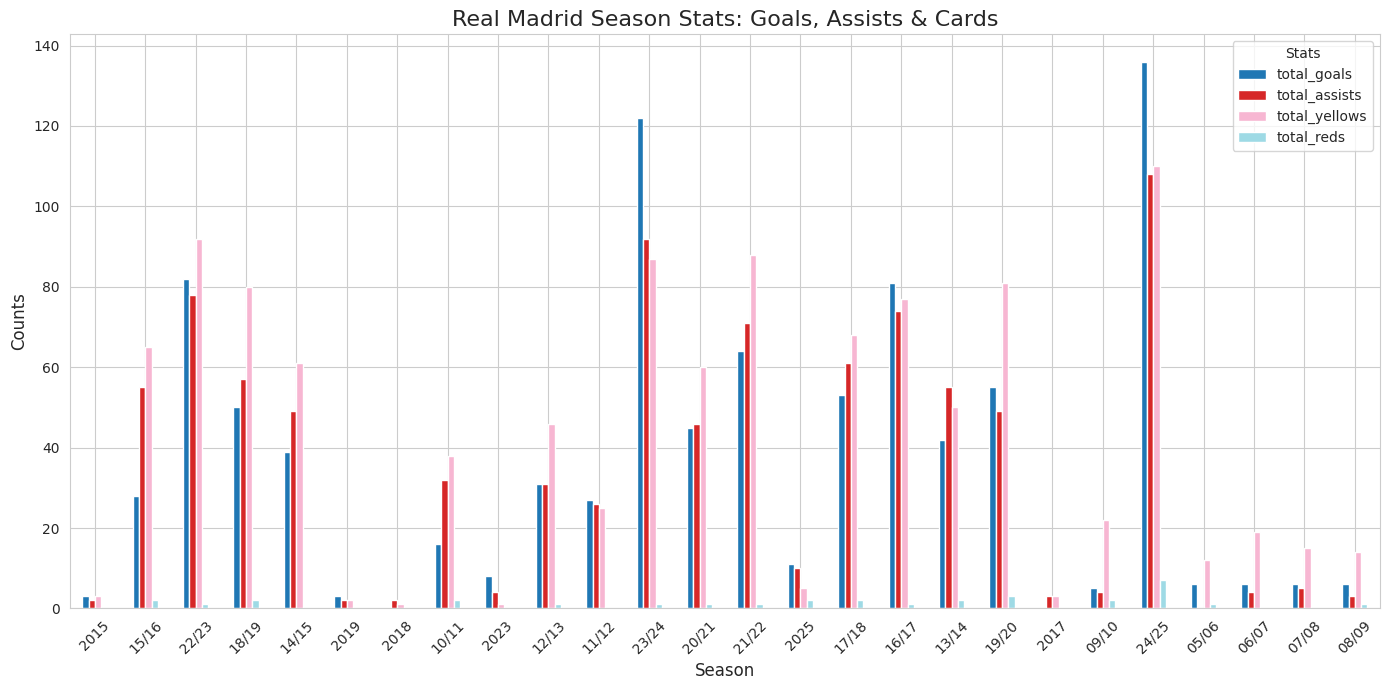

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

# draw Goals, Assists, Yellow & Red Cards
rm_stats_pd.set_index("season_name")[["total_goals", "total_assists", "total_yellows", "total_reds"]].plot(
    kind="bar", 
    figsize=(14,7), 
    rot=45, 
    colormap="tab20"
)

plt.title("Real Madrid Season Stats: Goals, Assists & Cards", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.legend(title="Stats")
plt.tight_layout()
plt.show()


## Another view 

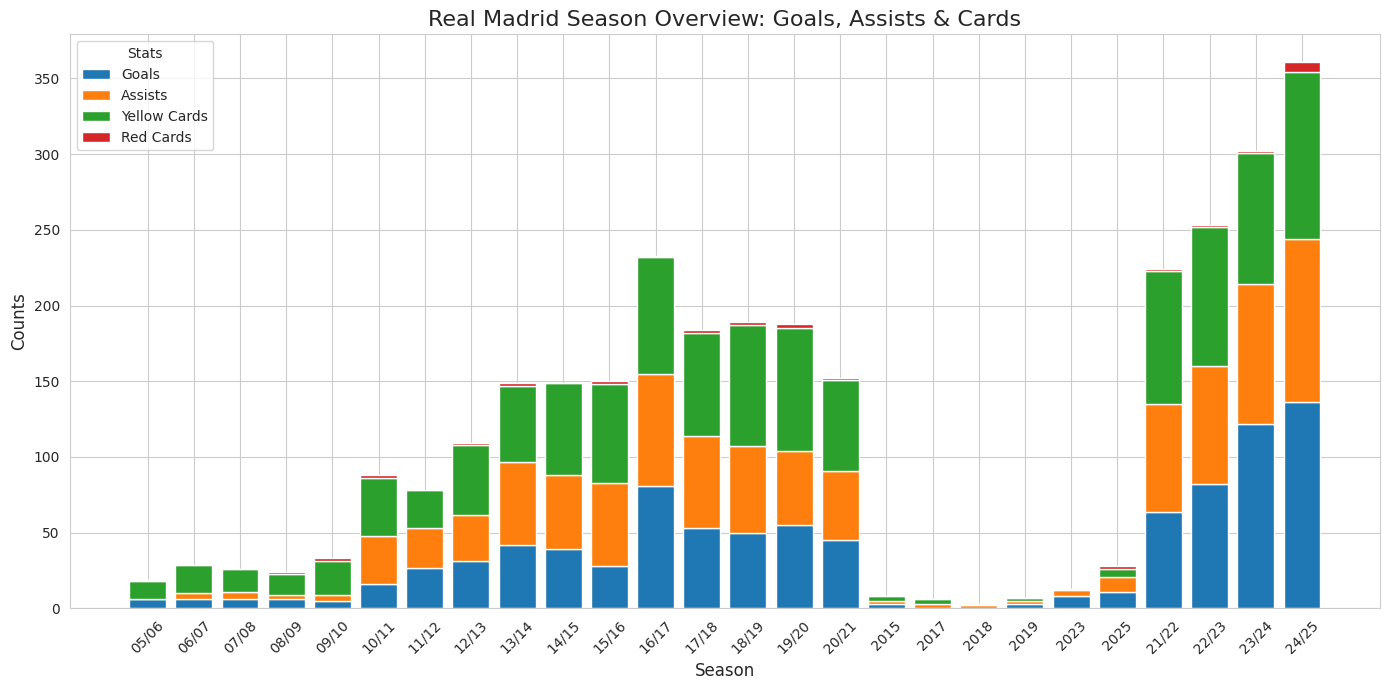

In [40]:

rm_stats_pd = team_stats.filter(team_stats.team_name == "Real Madrid").toPandas()

rm_stats_pd = rm_stats_pd.sort_values("season_name")

seasons = rm_stats_pd["season_name"]
goals = rm_stats_pd["total_goals"]
assists = rm_stats_pd["total_assists"]
yellow_cards = rm_stats_pd["total_yellows"]
red_cards = rm_stats_pd["total_reds"]

plt.figure(figsize=(14,7))

plt.bar(seasons, goals, label='Goals', color='#1f77b4')
plt.bar(seasons, assists, bottom=goals, label='Assists', color='#ff7f0e')
plt.bar(seasons, yellow_cards, bottom=goals+assists, label='Yellow Cards', color='#2ca02c')
plt.bar(seasons, red_cards, bottom=goals+assists+yellow_cards, label='Red Cards', color='#d62728')

plt.title("Real Madrid Season Overview: Goals, Assists & Cards", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Stats")
plt.tight_layout()
plt.show()


## Machine Learning Model

## 🧠 Decision Map:

- If your goal is financial/economic → create a model to predict Market Value.

- If your goal is medical/injuries → create a model to predict Injury Risk.

- If your goal is football / Performance → create a model to predict Goals/Assists/Minutes.

- If your goal is transfer analysis → create a model to predict Transfer Type or Probability.

## PySpark ML Models
## **Frist Market Value Prediction**

In [41]:
from pyspark.sql.functions import col, floor, months_between, current_date

df_profiles = dfs["player_profiles"] \
    .withColumn("age", floor(months_between(current_date(), col("date_of_birth"))/12)) \
    .withColumnRenamed("height", "height_in_cm")  


df_mv = dfs["player_market_value"].join(
    df_profiles.select("player_id", "age", "height_in_cm", "position"),
    on="player_id", how="left"
).dropna()

df_mv.show(5, False)


+---------+----------+--------+---+------------+--------------------+
|player_id|date_unix |value   |age|height_in_cm|position            |
+---------+----------+--------+---+------------+--------------------+
|410547   |2019-12-28|25000.0 |28 |180.0       |Defender - Left-Back|
|410547   |2022-01-02|150000.0|28 |180.0       |Defender - Left-Back|
|410547   |2023-06-28|175000.0|28 |180.0       |Defender - Left-Back|
|410547   |2024-06-11|250000.0|28 |180.0       |Defender - Left-Back|
|410547   |2024-12-11|250000.0|28 |180.0       |Defender - Left-Back|
+---------+----------+--------+---+------------+--------------------+
only showing top 5 rows



In [42]:
# Features
assembler = VectorAssembler(
    inputCols=["age", "height_in_cm"],
    outputCol="features"
)


## Random Forest Model for Regression

In [43]:
# Model &evaluate
data = assembler.transform(df_mv).select("features", col("value").alias("label"))

# split data to  Train/Test
train, test = data.randomSplit([0.8, 0.2], seed=42)

# Random Forest Regressor => model
rf = RandomForestRegressor(labelCol="label", featuresCol="features")
model = rf.fit(train)

# evaluate
preds = model.transform(test)
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(preds)
print(f"✅ Model trained. RMSE = {rmse:.2f}")

✅ Model trained. RMSE = 6927006.86


## sec Target Injury Risk Prediction 🩺

In [44]:
df_inj = dfs["player_injuries"].select(
    "player_id", "games_missed", "days_missed"
).dropna()

df_inj.show(5)


+---------+------------+-----------+
|player_id|games_missed|days_missed|
+---------+------------+-----------+
|   749087|           2|       11.0|
|   187288|           2|       16.0|
|   187288|           2|       16.0|
|   187288|           4|       27.0|
|   187288|           1|        4.0|
+---------+------------+-----------+
only showing top 5 rows



In [45]:
#Label =(1,0)

df_inj = df_inj.withColumn(
    "is_injured", 
    (col("days_missed") > 0).cast("integer")
)

df_inj.show(5)

+---------+------------+-----------+----------+
|player_id|games_missed|days_missed|is_injured|
+---------+------------+-----------+----------+
|   749087|           2|       11.0|         1|
|   187288|           2|       16.0|         1|
|   187288|           2|       16.0|         1|
|   187288|           4|       27.0|         1|
|   187288|           1|        4.0|         1|
+---------+------------+-----------+----------+
only showing top 5 rows



In [46]:
feature_cols = ["games_missed", "days_missed"]

assembler_inj = VectorAssembler(
    inputCols=feature_cols, 
    outputCol="features"
)

## Random Forest Classifier

In [47]:
# Random Forest classifier => model
rf_inj = RandomForestClassifier(
    labelCol="is_injured", 
    featuresCol="features", 
    numTrees=50
)


In [48]:
# Pipeline
pipeline_inj = Pipeline(stages=[assembler_inj, rf_inj])

# Train model 
model_inj = pipeline_inj.fit(df_inj.na.drop())


predictions_inj = model_inj.transform(df_inj.na.drop())
predictions_inj.select("player_id", "games_missed", "days_missed", "is_injured", "prediction", "probability").show(10, False)

+---------+------------+-----------+----------+----------+-----------+
|player_id|games_missed|days_missed|is_injured|prediction|probability|
+---------+------------+-----------+----------+----------+-----------+
|749087   |2           |11.0       |1         |1.0       |[0.0,1.0]  |
|187288   |2           |16.0       |1         |1.0       |[0.0,1.0]  |
|187288   |2           |16.0       |1         |1.0       |[0.0,1.0]  |
|187288   |4           |27.0       |1         |1.0       |[0.0,1.0]  |
|187288   |1           |4.0        |1         |1.0       |[0.0,1.0]  |
|449528   |4           |26.0       |1         |1.0       |[0.0,1.0]  |
|449528   |1           |15.0       |1         |1.0       |[0.0,1.0]  |
|449528   |4           |35.0       |1         |1.0       |[0.0,1.0]  |
|449528   |1           |7.0        |1         |1.0       |[0.0,1.0]  |
|599552   |6           |52.0       |1         |1.0       |[0.0,1.0]  |
+---------+------------+-----------+----------+----------+-----------+
only s

## 3th Performance Prediction

## I do not agree to create a model that predicts the number of goals because this is something that is not expected to be known

In [49]:
#df_perf = dfs["player_performances"].select(
#    "player_id", "minutes_played", "assists", "goals"
#)

In [50]:
#assembler_perf = VectorAssembler(
#    inputCols=["minutes_played", "assists"],
#    outputCol="features"
#)

In [51]:
#rf_perf = RandomForestRegressor(labelCol="goals", featuresCol="features")

In [52]:
#pipeline_perf = Pipeline(stages=[assembler_perf, rf_perf])
#model_perf = pipeline_perf.fit(df_perf.na.drop())